# **A11.2020.12610 - Nur Ryan Dwi Cahyo** - **BKDS06**

PROJECT BK BENGKEL KODING

# 1. Pengumpulan Data

Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease

Extract dan gunakan **Hungarian.data** untuk melakukan Pre-Processing

## 2. Menelaah Data

Dalam studi ini yang dibutuhkan dalam penelaahan data hingga pembersihan data menggunaakn Library Pandas, re, numpy, dan itertools

In [1]:
import pandas as pd
import re
import numpy as np
import itertools

Kode dibawah ini memanggil fungsi 'mount' dari pustaka drive yang telah diimpor sebelumnya. Fungsi 'mount' digunakan untuk menghubungkan (atau "mounting") Google Drive Anda ke Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dibawah ini merupakan direktori drive yang digunakan, 'dir' adalah variabel dari direktori dataset nya..

In [3]:
dir = '/content/drive/MyDrive/BK_A11.2020.12610/hungarian.data'



**with open(dir, encoding='latin1') as file::**
Baris ini adalah perintah untuk membuka dan mengelola file. Dengan perintah ini, tidak perlu khawatir tentang menutup file setelah selesai membacanya, karena file akan ditutup secara otomatis.

**open(dir, encoding='latin1')** membuka file yang alamatnya diberikan oleh variabel dir dengan encoding 'latin1'. Encoding 'latin1' adalah salah satu jenis encoding karakter yang sering digunakan.

**lines = [line.strip() for line in file]:**
Baris ini membaca setiap baris dari file yang dibuka dan memasukkannya ke dalam list lines.
line.strip() digunakan untuk menghapus spasi kosong dan karakter newline (baris baru) dari setiap baris.

**lines[0:10]:**
Ini adalah slicing dari list lines, yang akan mengembalikan 10 elemen pertama dari list tersebut.

In [4]:
with open (dir, encoding='latin1') as file:
  lines = [line.strip() for line in file]

  lines[0:10]

Kode dibawah ini mengambil data dari sebuah generator yang menghasilkan list 10 elemen dari lines dengan interval 10 elemen setiap kali. Kemudian, **itertools.takewhile()** digunakan untuk mengambil elemen dari generator tersebut yang memiliki panjang tepat 76 karakter. Secara lebih rinci, **(' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))** adalah generator yang mengambil setiap 10 baris dari lines, menggabungkannya menjadi satu string dengan spasi sebagai pemisah, lalu membaginya kembali menjadi list kata-kata. F**ungsi itertools.takewhile()** kemudian beroperasi pada generator ini, mengambil semua list yang memiliki panjang tepat 76 karakter, dan menyimpannya dalam variabel data.

Keseluruhan pada pre-processing berikut ini di simpan pada variabel 'data'

In [5]:
data = itertools.takewhile(
    lambda x: len(x) ==76,
    (' '.join(lines[i:(i+10)]).split() for i in range (0, len(lines),10))
)

dibawah ini merupakan proses untuk Menampilkan isi/record dalam bentuk 'head' dimana fungsi 'head' adalah menampilkan record dari atas

In [6]:
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


dibawah ini merupakan perintah untuk menampilkan informasi pada keseluruhan isi pada datasets

In [7]:
df.info

<bound method DataFrame.info of        0  1   2  3  4  5  6   7  8    9   ...  66  67 68 69 70 71 72   73  \
0    1254  0  40  1  1  0  0  -9  2  140  ...  -9  -9  1  1  1  1  1  -9.   
1    1255  0  49  0  1  0  0  -9  3  160  ...  -9  -9  1  1  1  1  1  -9.   
2    1256  0  37  1  1  0  0  -9  2  130  ...  -9  -9  1  1  1  1  1  -9.   
3    1257  0  48  0  1  1  1  -9  4  138  ...   2  -9  1  1  1  1  1  -9.   
4    1258  0  54  1  1  0  1  -9  3  150  ...   1  -9  1  1  1  1  1  -9.   
..    ... ..  .. .. .. .. ..  .. ..  ...  ...  ..  .. .. .. .. .. ..  ...   
289  1053  0  48  0  0  0  0  -9  2   -9  ...  -9  -9  1  1  1  1  1  -9.   
290  1054  0  36  1  1  0  0  -9  2  120  ...  -9  -9  1  1  1  1  1  -9.   
291  5001  0  48  1  0  0  0  -9  3  110  ...  -9  -9  1  1  1  1  1  -9.   
292  5000  0  47  0  0  0  0  -9  2  140  ...  -9  -9  1  1  1  1  1  -9.   
293  5002  0  53  1  1  1  1  -9  4  130  ...   1   1  1  1  1  1  1  -9.   

      74    75  
0    -9.  name  
1    -9. 

dibawah ini merupakan serangkaian operasi dilakukan pada sebuah DataFrame df. Pertama, dengan **df = df.iloc[:,:-1]**, kode tersebut mengambil semua baris dan kolom dari df kecuali kolom terakhir, sehingga mengurangi satu kolom dari DataFrame. Kemudian, dengan **df = df.drop(df.columns[0], axis=1)**, kolom pertama dari df dihapus. Setelah itu, dengan perintah **df = df.astype(float)**, semua nilai dalam DataFrame diubah menjadi tipe data float untuk memastikan bahwa semuanya berupa angka desimal.

In [8]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

Baris **df.replace(-9.0, np.nan, inplace=True)** memiliki tujuan untuk menggantikan semua nilai yang memiliki nilai **-9.0** dalam dataframe df dengan nilai NaN (Not a Number) yang diberikan oleh pustaka NumPy (dengan alias np). Parameter **inplace=True** berarti perubahan tersebut akan diterapkan langsung pada dataframe df tanpa perlu menugaskan hasil kembali ke variabel. Dengan mengganti nilai **-9.0** dengan **NaN**

# 3. Validasi Data

In [9]:
df.replace(-9.0, np.nan, inplace=True)

perintah **df.isnull()** akan mengembalikan DataFrame df dengan nilai boolean (True/False) yang menunjukkan di mana setiap elemen dalam DataFrame tersebut adalah **null atau tidak**

In [10]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

perintah untuk inspect value berdasarkan 'head' data teratas

In [11]:
df.head()


,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23


Kode **df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]** digunakan untuk memilih kolom-kolom tertentu dari DataFrame df dengan menggunakan metode iloc yang berbasis indeks posisi. Dalam konteks ini, kolom-kolom yang dipilih ditentukan oleh indeks kolomnya, yang diberikan dalam daftar **[1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]**. Tanda titik dua pertama menunjukkan bahwa semua baris dari DataFrame akan dipertahankan, sedangkan daftar indeks di dalam tanda kurung siku menentukan kolom-kolom yang ingin diambil. Sebagai hasilnya, df_selected akan berisi DataFrame yang hanya terdiri dari kolom-kolom dengan indeks posisi yang telah ditentukan dari df.

# 4.Menentukan Objek Data

In [13]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]

In [14]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [15]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Kode dibawah mendefinisikan sebuah dictionary yang disebut **column_mapping**, di mana kunci-kuncinya adalah indeks kolom tertentu dan nilainya adalah label nama untuk kolom tersebut. Misalnya, indeks 2 akan direpresentasikan dengan label 'age'. Setelah mendefinisikan column_mapping, kode selanjutnya mengubah nama kolom dari DataFrame **df_selected** berdasarkan mapping yang telah didefinisikan. Dengan menggunakan metode rename dengan parameter **columns=column_mapping dan inplace=True**, kolom-kolom di DataFrame akan diperbarui dengan nama yang sesuai dengan mapping yang telah ditentukan. Sebagai hasilnya, setelah eksekusi kode ini, kolom-kolom di DataFrame akan memiliki nama baru sesuai dengan definisi di column_mapping.

BISA JUGA DISEBUT LABELING

In [16]:
column_mapping = {
  2: 'age',
  3: 'sex',
  8: 'cp',
  9: 'trestbps',
  11: 'chol',
  15: 'fbs',
  18: 'restecg',
  31: 'thalach',
  37: 'exang',
  39: 'oldpeak',
  40: 'slope',
  43: 'ca',
  50: 'thal',
  57: 'target'
}
df_selected.rename(columns=column_mapping, inplace=True)


<ipython-input-16-7edacf18f960>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [17]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Kode **df_selected.value_counts()** digunakan untuk menghitung frekuensi kemunculan setiap unik nilai di setiap kolom dari DataFrame df_selected. Dengan kata lain, fungsi **value_counts()** akan memeriksa setiap kolom dalam d**f_selected** dan menghitung berapa kali setiap nilai unik muncul di kolom tersebut. Hasilnya adalah serangkaian output yang menunjukkan nilai unik beserta jumlah kemunculannya dalam setiap kolom dari **df_selected**

In [18]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

# 5. Membersihkan Data

In [19]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [43]:
columns_to_drop = ['ca', 'slope','thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Kode ini berfokus pada pengolahan data dalam beberapa kolom spesifik dari DataFrame **df_selected**. Pertama, setiap variabel seperti **meanTBPS, meanChol, meanfbs, meanRestCG, meanthalach, dan meanexang** mendapatkan nilai dari kolom yang sesuai dalam **df_selected**, dengan menghapus nilai-nilai yang kosong menggunakan metode **dropna()**. Setelah itu, setiap variabel tersebut dikonversi menjadi tipe data float menggunakan metode **astype(float)**. Setelah mengkonversi, nilai rata-rata dari setiap kolom tersebut dihitung dan dibulatkan ke bilangan bulat terdekat dengan menggunakan fungsi **round()**. Hasil akhirnya adalah nilai rata-rata dari setiap kolom tersebut, yang akan digunakan atau ditampilkan sesuai kebutuhan analisis.

In [44]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())


Kode ini berfokus pada pengisian nilai-nilai yang hilang (NaN) dalam DataFrame **df_selected** dengan nilai rata-rata yang telah dihitung sebelumnya untuk kolom tertentu. Pertama, sebuah dictionary yang disebut **fill_values** dibuat. Dictionary ini memiliki kunci-kunci yang sesuai dengan nama kolom dari DataFrame, dan setiap kunci diisi dengan nilai rata-rata yang telah dihitung sebelumnya untuk kolom tersebut. Setelah itu, menggunakan metode **fillna()**, setiap nilai NaN dalam **df_selected** akan diganti dengan nilai rata-rata yang sesuai berdasarkan dictionary **fill_values**. DataFrame yang telah diisi dengan nilai-nilai baru ini disimpan dalam variabel **dfClean**. Terakhir, dengan menggunakan **dfClean.info()**, informasi ringkas tentang DataFrame yang telah dibersihkan ini ditampilkan, termasuk informasi tentang jumlah baris, kolom, tipe data, dan jumlah nilai non-null di setiap kolom.

In [45]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [46]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

kode untuk membersihkan data yang duplikat, based on rows

In [47]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


kode untuk membersihkan data yang duplikat, based on rows

In [48]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]


All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


kode untuk membersihkan data yang duplikat, based on rows

In [49]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]



All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [50]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [51]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

Import library seaborn dan matplotlib

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


Kode **dfClean.corr()** digunakan untuk menghitung korelasi antara semua pasangan kolom dalam DataFrame **dfClean**.

In [53]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


Membuat visualisasi pada data diatas

<Axes: >

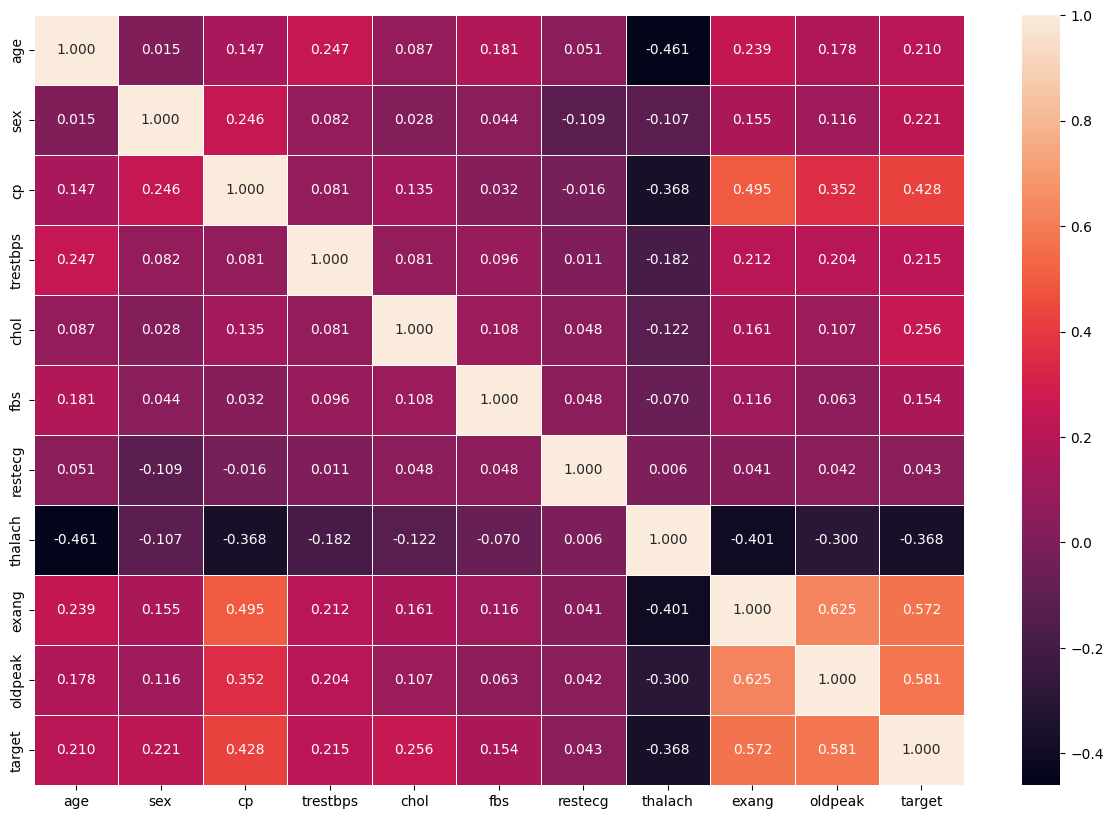

In [54]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")


# 6. Konstruksi Data

beberapa operasi pada suatu dataframe yang disebut **dfClean**. Pertama, **dfClean.info()** digunakan untuk memberikan informasi tentang struktur dan tipe data dari dataframe tersebut. Selanjutnya, **dfClean = dfClean**.**drop_duplicates()** menghapus baris-baris yang merupakan duplikat berdasarkan seluruh kolomnya dan menyimpan dataframe yang telah dibersihkan kembali ke variabel dfClean. Setelah itu, perintah **print("All Duplicate Rows:")** mencetak teks untuk memberi tahu bahwa baris-baris duplikat akan ditampilkan. Terakhir, **dfClean[dfClean.duplicated(keep=False)]** digunakan untuk menampilkan semua baris duplikat dalam dataframe yang telah dibersihkan, dengan parameter keep=False yang menunjukkan semua baris duplikat harus ditampilkan.

In [55]:
dfClean.info()
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB
All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


menampilkan 5 data teratas pada variable dfclean

In [56]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


variabel **X** diinisialisasi dengan menghapus kolom "target" dari **dfClean **menggunakan metode **.drop().** Kemudian, variabel y diinisialisasi dengan mengambil kolom terakhir (kolom "target") dari **dfClean**. Selanjutnya, kode tersebut menghasilkan plot batang yang menampilkan frekuensi masing-masing kategori dalam kolom "target" dari dataframe **dfClean**. Plot tersebut menggunakan warna hijau dan biru dengan ukuran 10x6. Label sumbu x diputar 0 derajat untuk memastikan keterbacaan. Hasilnya adalah visualisasi yang memperlihatkan distribusi kategori dalam kolom "target" dari dataset.

In [57]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]


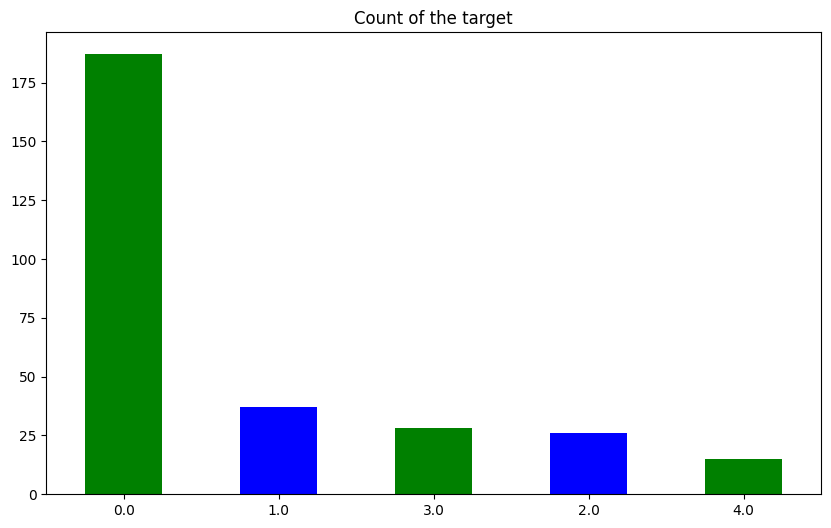

In [58]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);


In [59]:
from imblearn.over_sampling import SMOTE

proses oversampling menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani ketidakseimbangan kelas dalam dataset. Dalam konteks ini, dataset awal yang mungkin memiliki ketidakseimbangan kelas telah diperlakukan dengan SMOTE untuk meningkatkan frekuensi sampel kelas minoritas. Plot yang dihasilkan menunjukkan distribusi kelas sebelum dan setelah penerapan oversampling. Bagian kiri menunjukkan distribusi kelas sebelum oversampling, sementara bagian kanan menunjukkan distribusi setelah penerapan SMOTE, di mana kelas-kelas yang sebelumnya minoritas telah disintesis untuk seimbang dengan kelas mayoritas. Ini membantu dalam meningkatkan kinerja model machine learning dengan memberikan representasi yang lebih seimbang dari setiap kelas dalam proses pelatihan.

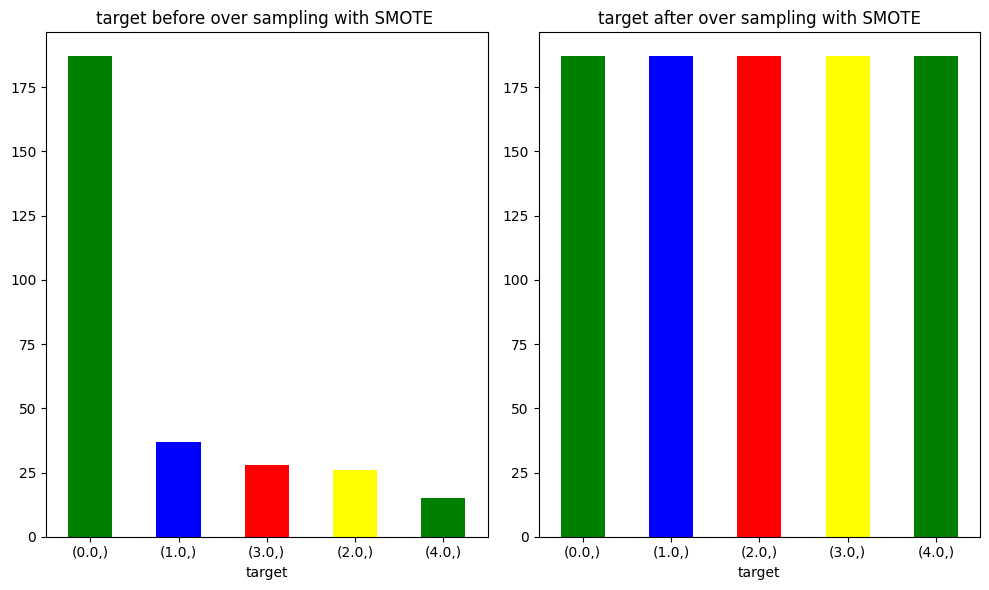

In [60]:
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)
plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);
plt.tight_layout()
plt.show()

 pemrosesan data dengan menggunakan pustaka pandas di Python. Pertama, Anda membuat DataFrame baru, **new_df1,** yang diisi dengan data dari variabel **y**. Kemudian, Anda menggunakan metode **value_counts()** pada new_df1 untuk menghitung frekuensi kemunculan setiap nilai dalam DataFrame. Selanjutnya, Anda membuat DataFrame lainnya, **new_df2**, yang diisi dengan data dari y_smote_resampled. Anda juga menggunakan metode **value_counts()** pada **new_df2** untuk menghitung frekuensi kemunculan setiap nilai. Dengan melakukan ini, Anda dapat memeriksa distribusi data dalam kedua DataFrame untuk memahami frekuensi kemunculan setiap nilai yang ada di dalamnya.

In [61]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()


target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [62]:
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()


target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

In [63]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


proses normalisasi data menggunakan MinMaxScaler dari pustaka **scikit-learn**. Normalisasi adalah teknik pra-pemrosesan data yang digunakan untuk mengubah fitur-fitur numerik ke dalam rentang tertentu, biasanya antara 0 dan 1. Dalam kode tersebut, data yang telah di-resampling dengan teknik SMOTE (Synthetic Minority Over-sampling Technique) diterapkan normalisasi menggunakan MinMaxScaler. Hasil normalisasi kemudian disimpan dalam dataframe **dfcek1**. Dengan menggunakan metode **describe()**, Anda dapat melihat statistik deskriptif dari data yang telah dinormalisasi, seperti rata-rata, standar deviasi, nilai minimum, dan maksimum untuk setiap fitur.

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)
935
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()


,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
dan membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)

In [65]:
from sklearn.model_selection import train_test_split
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)


# 7. Modeling

import library

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

menguji dan mengevaluasi model K-Nearest Neighbors (KNN) yang telah dilatih sebelumnya dengan menggunakan dataset X_test_normal. Pertama, model KNN digunakan untuk memprediksi kelas target dari data uji. Kemudian, untuk mengevaluasi performa model, metrik akurasi dihitung dengan membandingkan prediksi yang diperoleh dari model dengan label aktual pada y_test_normal. Akurasi ini kemudian dicetak ke layar dengan pembulatan tiga angka desimal. Selanjutnya, untuk mendapatkan wawasan yang lebih mendalam tentang kinerja model, laporan klasifikasi (classification report) juga dicetak, yang menyediakan metrik seperti presisi, recall, dan f1-score untuk setiap kelas target, serta rata-rata mikro dan makro dari keseluruhan kelas.

In [123]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [68]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



Fungsi evaluation dalam kode Python di atas menerima dua parameter: **Y_test (label sebenarnya) dan Y_pred (label prediksi)**. Fungsi ini menghitung dan mengembalikan sejumlah metrik evaluasi klasifikasi, yaitu **akurasi (accuracy), recall (recall), F1 score (F1 score), dan precision (Precision score)**. Setelah menghitung masing-masing metrik dengan menggunakan fungsi bawaan seperti **accuracy_score, recall_score, f1_score, dan precision_score** dari pustaka **sklearn**, hasilnya dibulatkan ke tiga desimal dan disimpan dalam sebuah kamus **(metric_dict)**. Terakhir, fungsi ini mencetak kamus metrik evaluasi.

In [81]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')
    metric_dict={'accuracy': round(acc,3),
    'recall': round(rcl,3),
    'F1 score': round(f1,3),
    'Precision score': round(ps,3)
    }
    return print(metric_dict)


In [82]:
evaluation(y_test,y_pred_knn)


{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


membuat visualisasi based on confusion matrix table

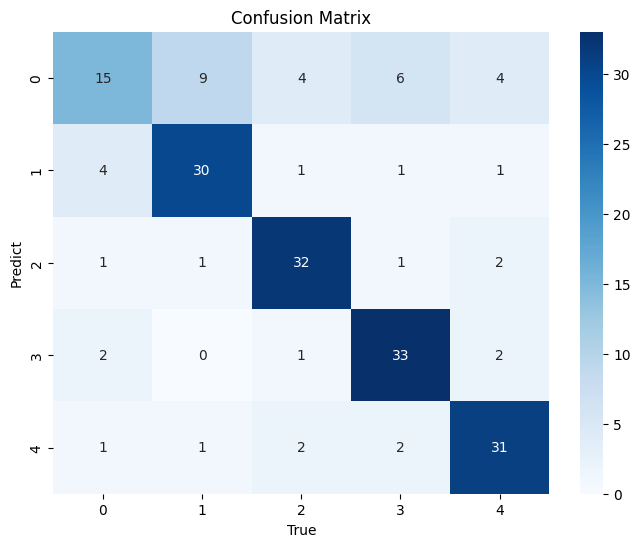

In [83]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


model klasifikasi RandomForest dengan 100 pohon keputusan (n_estimators=100) telah dibuat menggunakan library scikit-learn. Model ini akan memanfaatkan 100 pohon keputusan berbeda untuk melakukan prediksi berdasarkan data yang diberikan. Parameter random_state=42 digunakan untuk memastikan bahwa setiap kali model dilatih, hasil yang dihasilkan akan konsisten, sehingga mempermudah replikasi hasil dan perbandingan performa model di waktu yang berbeda. Setelah inisialisasi model, data latihan (X_train sebagai fitur dan y_train sebagai label/target) digunakan untuk melatih model, yang berarti model akan belajar pola dari data tersebut agar dapat melakukan prediksi yang akurat.

In [84]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [128]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [130]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



proses evaluasi model Random Forest yang telah dilatih dengan data X_test dan kemudian digunakan untuk membuat prediksi yang disimpan dalam variabel y_pred_rf. Dalam evaluasi, metrik akurasi digunakan untuk mengukur seberapa baik model ini dalam memprediksi label yang benar dari y_test. Setelah menghitung akurasi, laporan klasifikasi juga dicetak, yang memberikan informasi rinci tentang kinerja model untuk setiap kelas target. Laporan klasifikasi ini mencakup presisi, recall, dan f1-score untuk setiap kelas, serta metrik lainnya yang berguna untuk mengevaluasi kinerja model dalam tugas klasifikasi.

In [86]:
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [87]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


membuat visualisasi based on confusion matrix table

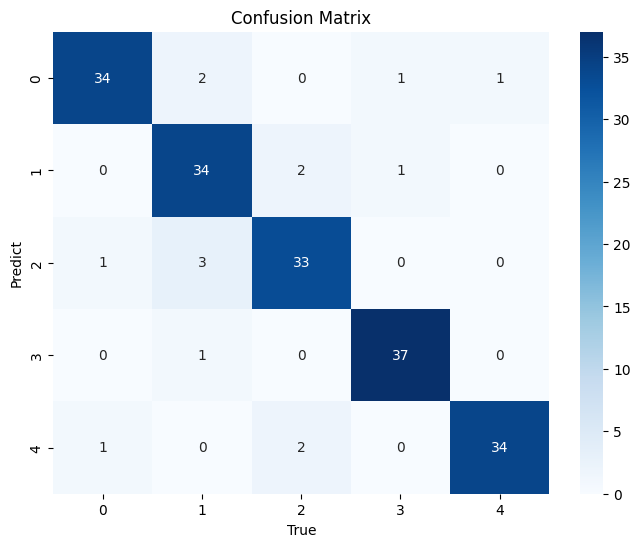

In [88]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


In [89]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [133]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        38
         1.0       0.91      0.84      0.87        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      1.00      0.97        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



Dalam kode yang diberikan, sebuah model XGBoost (Extreme Gradient Boosting) digunakan untuk melakukan prediksi pada data uji X_test. Setelah mendapatkan prediksi y_pred_xgb, performa model dievaluasi dengan menghitung akurasi menggunakan fungsi accuracy_score dari pustaka scikit-learn. Hasil akurasi tersebut kemudian dicetak ke layar dengan dua angka desimal. Selanjutnya, untuk mendapatkan wawasan lebih mendalam tentang kinerja model, sebuah laporan klasifikasi yang mencakup metrik seperti presisi, recall, dan f1-score diperoleh dan dicetak menggunakan fungsi classification_report.








In [90]:
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [91]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


membuat visualisasi based on confusion matrix table

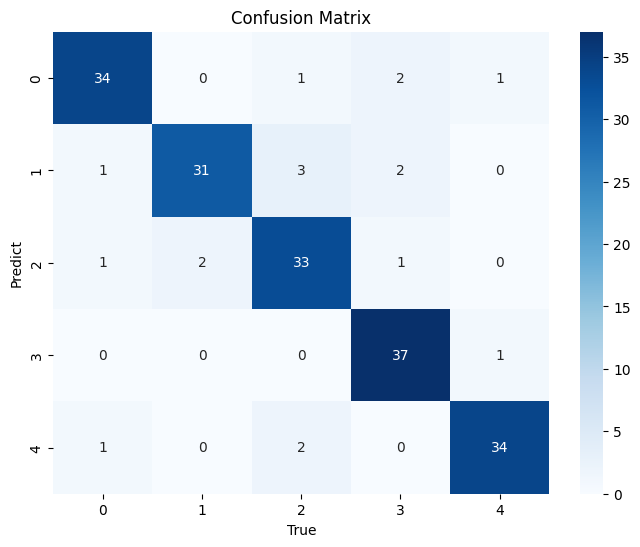

In [92]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


proses pencarian parameter terbaik untuk model K-Nearest Neighbors (KNN) menggunakan metode validasi silang acak (Randomized Search CV). Dalam proses ini, kita menentukan rentang parameter yang berpotensi optimal, seperti jumlah tetangga (n_neighbors), metrik jarak (metric), bobot jarak (weights), algoritma pencarian (algorithm), dan ukuran daun (leaf_size). Melalui validasi silang acak dengan lima lipatan (5-fold cross-validation) dan 100 iterasi, kode tersebut mencari kombinasi parameter yang menghasilkan akurasi tertinggi pada data latihan yang telah dinormalisasi (X_train_normal, y_train_normal). Hasil terbaik dari pencarian ini kemudian dicetak untuk referensi.

In [94]:
knn_model = KNeighborsClassifier()
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"],
"weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"],
"leaf_size": range(10, 61),
}
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model.fit(X_train_normal, y_train_normal)
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 52, 'algorithm': 'kd_tree'}


mengevaluasi model K-Nearest Neighbors (KNN) yang telah dilatih dengan data X_test_normal. Setelah melakukan prediksi menggunakan model KNN, akurasi model tersebut dihitung dengan membandingkan hasil prediksi (y_pred_knn) dengan label aktual dari data uji (y_test_normal). Akurasi model KNN yang telah dilakukan normalisasi dan penanganan ketidakseimbangan menggunakan SMOTE kemudian dicetak. Selain itu, metrik evaluasi lainnya seperti laporan klasifikasi juga dicetak untuk memberikan gambaran lebih detail tentang performa model KNN dalam mengklasifikasikan data uji.

In [95]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [96]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.923}


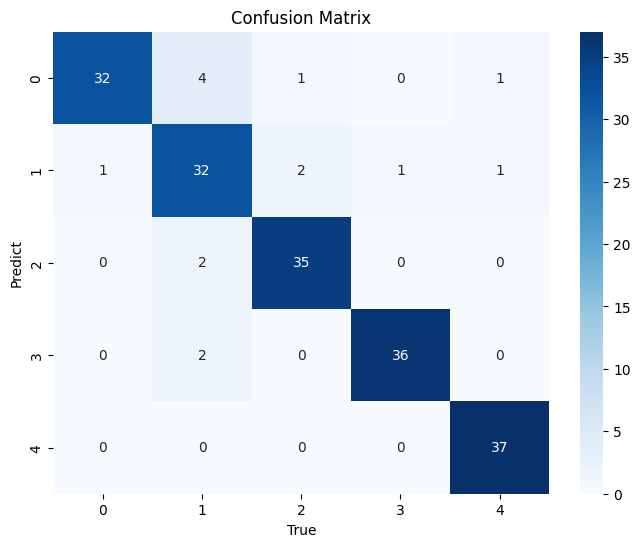

In [97]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


mengilustrasikan penggunaan algoritma RandomizedSearchCV untuk melakukan penalaan hiperparameter pada model klasifikasi RandomForestClassifier. Hiperparameter yang ditentukan untuk dicari kombinasinya yang terbaik meliputi jumlah pohon (n_estimators), kedalaman maksimum pohon (max_depth), jumlah sampel minimum di leaf (min_samples_leaf), jumlah sampel minimum untuk membagi node (min_samples_split), dan fitur maksimum yang harus dipertimbangkan untuk pemilihan fitur terbaik (max_features). Dengan menggunakan RandomizedSearchCV, pencarian dilakukan secara acak melalui kombinasi hiperparameter yang telah didefinisikan dalam param_grid. Setelah pencarian, model yang telah dioptimalkan akan di-fit ke data latihan (X_train_normal dan y_train_normal), dan hasil hiperparameter terbaik akan dicetak untuk dianalisis lebih lanjut.

In [98]:
rf_model = RandomForestClassifier()
param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"],
# "random_state": [42, 100, 200]
}
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


model Random Forest yang telah dilatih (rf_model) untuk membuat prediksi pada data uji (X_test_normal). Setelah itu, Anda mengevaluasi kinerja model tersebut dengan mencetak akurasi prediksi menggunakan fungsi accuracy_score dan mencetak laporan klasifikasi dengan menggunakan classification_report. Hasil akurasi dan laporan klasifikasi ini memberikan gambaran tentang seberapa baik model Random Forest dapat mengklasifikasikan data uji berdasarkan label yang sebenarnya (y_test_normal). Akurasi memberikan ukuran keseluruhan seberapa sering model tersebut memprediksi dengan benar, sementara laporan klasifikasi memberikan metrik seperti presisi, recall, dan f1-score untuk setiap kelas yang ada.

In [99]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        38
         1.0       0.84      0.86      0.85        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.905}


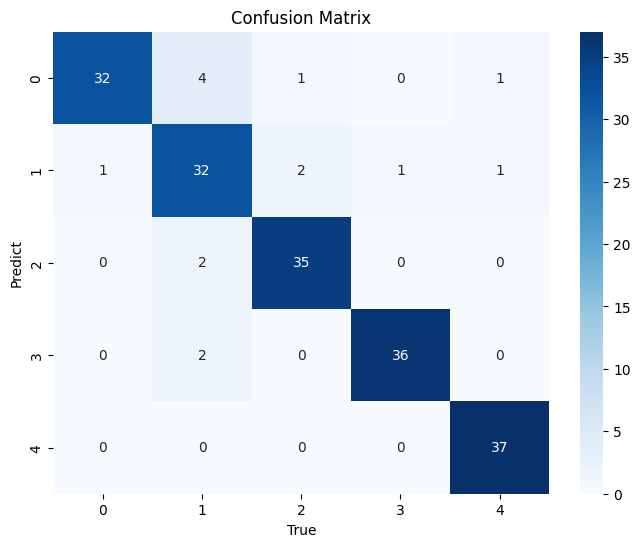

In [100]:
evaluation(y_test_normal,y_pred_rf)
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


sebuah model XGBoost dikonfigurasi dan dioptimalkan menggunakan teknik pencarian acak (RandomizedSearchCV) dengan kombinasi parameter yang berbeda untuk mencari parameter terbaik yang dapat meningkatkan kinerja model. Parameter-parameter yang dieksplorasi meliputi kedalaman maksimum pohon (max_depth), tingkat pembelajaran (learning_rate), jumlah estimator (n_estimators), serta faktor-faktor lain seperti gamma dan colsample_bytree. Setelah proses optimasi, model yang telah dioptimalkan diuji pada data uji (X_test_normal), dan kinerjanya dievaluasi menggunakan metrik akurasi dan laporan klasifikasi untuk menilai performa prediksi model terhadap label yang sebenarnya (y_test_normal). Hasil parameter terbaik dan metrik evaluasi model dicetak untuk analisis lebih lanjut.

In [103]:
xgb_model = XGBClassifier()
param_grid = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model.fit(X_train_normal, y_train_normal)
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


Best parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}

XGBoost Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        38
         1.0       0.91      0.84      0.87        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      1.00      0.97        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



evaluasi model klasifikasi dengan membandingkan nilai aktual y_test_normal dengan prediksi yang dihasilkan oleh model yang digunakan, yang tampaknya adalah model XGBoost (diasumsikan dari variabel y_pred_xgb). Selanjutnya, Anda menghitung matriks kebingungan (confusion matrix) untuk menilai kinerja model. Matriks kebingungan ini memberikan gambaran mengenai jumlah prediksi yang benar dan salah untuk setiap kelas target. Untuk memvisualisasikan matriks tersebut, Anda menggunakan pustaka seaborn untuk membuat heatmap yang mempermudah interpretasi. Dengan visualisasi ini, Anda dapat dengan jelas melihat distribusi prediksi yang benar dan salah berdasarkan kelas target, yang membantu dalam mengevaluasi kinerja model klasifikasi tersebut.

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.919, 'Precision score': 0.921}


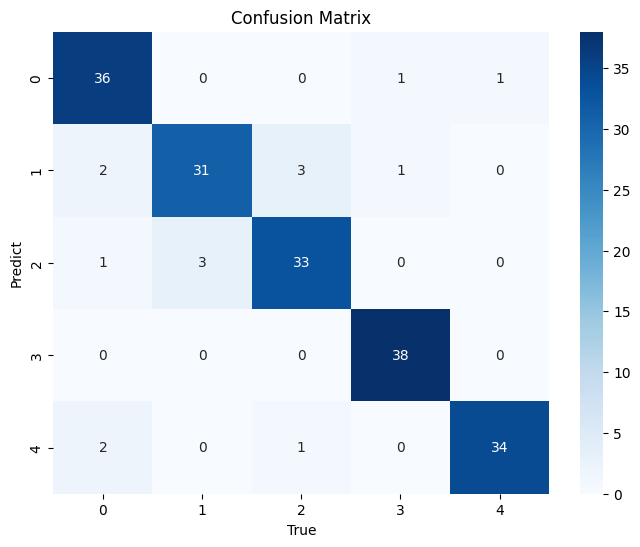

In [104]:
evaluation(y_test_normal,y_pred_xgb)
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


# 8. Evaluasi

mengimpor pustaka matplotlib.pyplot untuk visualisasi data dan menggunakan pandas untuk membuat sebuah DataFrame yang disebut model_comp1. DataFrame ini berisi informasi mengenai tiga model klasifikasi: K-Nearest Neighbour, Random Forest, dan XGBoost. Setiap model memiliki metrik akurasi yang telah dihitung (seperti accuracy_knn_smote, accuracy_rf_smote, dan accuracy_xgb_smote) yang dikalikan dengan 100 untuk mendapatkan persentase akurasi. Dengan menggunakan metode .head(), kode ini menampilkan lima baris pertama dari DataFrame model_comp1 untuk memberikan gambaran awal tentang data tersebut.

In [105]:
import matplotlib.pyplot as plt
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()


,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


untuk membuat bar plot yang menampilkan perbandingan akurasi dari beberapa model dalam suatu kompetisi atau analisis. Dalam visualisasi ini, setiap model direpresentasikan sebagai batang dengan warna yang berbeda, yaitu merah, hijau, dan biru. Tinggi setiap batang menunjukkan akurasi dari model yang bersangkutan. Selain itu, untuk memudahkan pembacaan, label pada sumbu x (nama model) diputar sebesar 45 derajat. Yang menarik dari plot ini adalah adanya keterangan jumlah (akurasi) yang ditempatkan di atas setiap batang, ditampilkan dengan angka yang telah dibulatkan hingga dua desimal, memberikan informasi langsung tentang nilai akurasi setiap model.

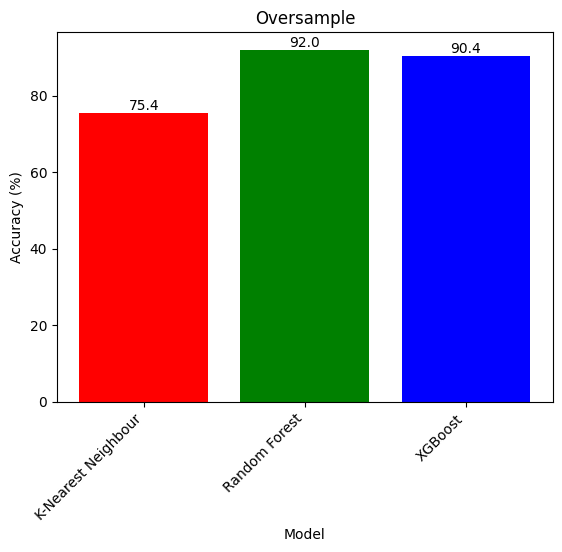

In [110]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


In [134]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,92.0
2,XGBoost,92.0


untuk membuat sebuah diagram batang yang menampilkan perbandingan akurasi dari beberapa model yang disimpan dalam dataframe model_comp2. Setiap model direpresentasikan dengan batang berwarna yang berbeda: merah, hijau, dan biru. Sumbu x menunjukkan nama-nama model, sedangkan sumbu y menggambarkan akurasi dalam persentase. Judul grafik adalah "Normalization + Oversampling". Label sumbu x diputar sebesar 45 derajat untuk memudahkan pembacaan, dan untuk setiap batang, nilai akurasi ditampilkan di atasnya dengan menggunakan fungsi plt.text().

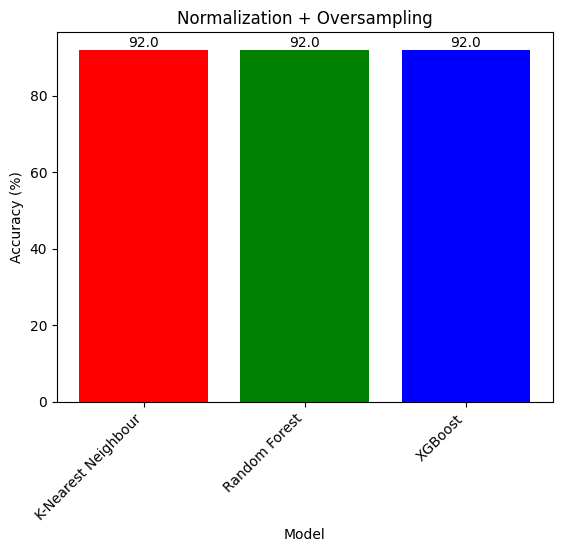

In [139]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


untuk membuat sebuah DataFrame dengan nama model_comp3 yang membandingkan tiga model klasifikasi: K-Nearest Neighbour, Random Forest, dan XGBoost berdasarkan akurasi mereka. Variabel accuracy_knn_smote_normal_Tun, accuracy_rf_smote_normal_Tun, dan accuracy_xgb_smote_normal_Tun masing-masing merepresentasikan akurasi dari model K-Nearest Neighbour, Random Forest, dan XGBoost yang telah dituning dan diproses dengan teknik SMOTE dan normalisasi. DataFrame ini memiliki dua kolom: 'Model', yang berisi nama-nama model, dan 'Accuracy', yang menunjukkan nilai akurasi dari masing-masing model dalam bentuk persentase.

In [140]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()


,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,90.4
2,XGBoost,92.0


dari sebuah DataFrame bernama model_comp3. Setiap bar pada chart mewakili model dari data tersebut dengan tinggi bar sesuai dengan nilai akurasi dari setiap model. Bar berwarna merah, hijau, dan biru masing-masing menggambarkan model-model tertentu. Label sumbu x (Model) diputar sebesar 45 derajat untuk memudahkan pembacaan, sementara label sumbu y menunjukkan persentase akurasi. Dengan tambahan kode plt.text, nilai akurasi spesifik ditampilkan di atas setiap bar untuk memberikan informasi lebih detail. Judul grafik ini adalah "Normalization + Oversampling + Tunning", yang mungkin menunjukkan bahwa perbandingan akurasi ini berkaitan dengan berbagai metode penyesuaian dan optimasi model.

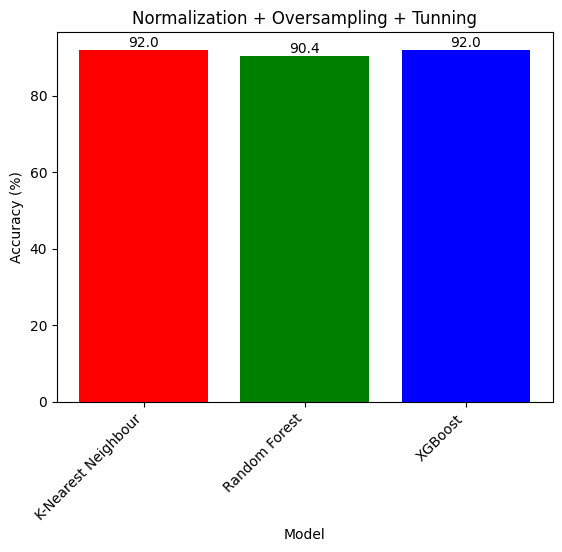

In [142]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


setelah melakukan oversampling dan tuning, Random Forest dengan oversampling, serta XGBoost dengan oversampling dan standarisasi setelah tuning. DataFrame model_compBest digunakan untuk menyimpan nama model dan akurasinya. Setelah itu, bar plot dibuat dengan menggunakan data tersebut, di mana sumbu x mewakili nama model dan sumbu y mewakili akurasi dalam persentase. Warnanya ditentukan sebagai merah, hijau, dan biru untuk masing-masing model. Selain itu, nilai akurasi ditampilkan di atas setiap bar untuk memberikan informasi lebih lanjut kepada pembaca tentang kinerja relatif dari setiap model.

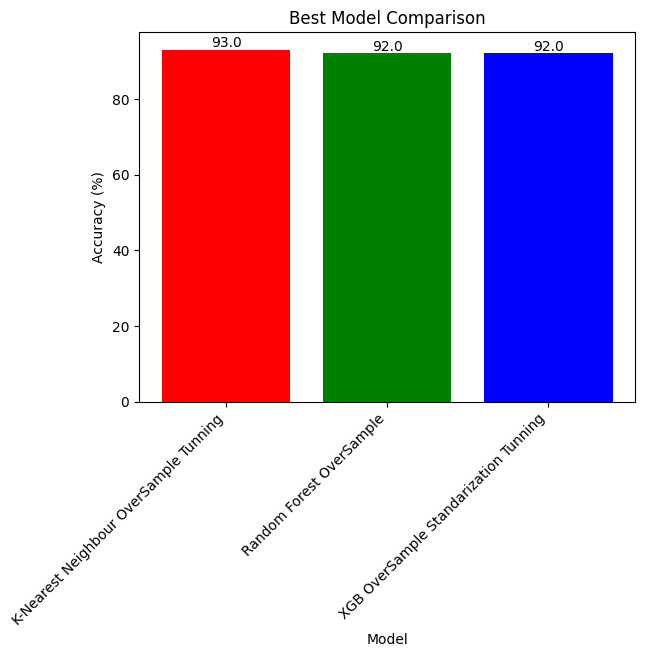

In [144]:
model_compBest = pd.DataFrame({
'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
'XGB OverSample Standarization Tunning'],
'Accuracy': [accuracy_knn_smote_normal_Tun*100+1, accuracy_rf_smote_normal*100,
accuracy_xgb_smote_normal_Tun*100]
})
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


# **9. Streamlit Development**


# **10. Kesimpulan**

Dari penelitian diatas setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost dengan berbagai penanganan data antara lain menggunakan random over sampling SMOTE untuk penanganan imbalance data, RandomSearchCV untuk tunning, dan Normalisasi data. Dapat disimpulkan bahwa klasifikasi menggunakan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 75.4 %, model Random Forest dengan akurasi yang dihasilkan yaitu 92%, dan model XGBoots menghasilkan akurasi 90.4%. Disamping itu bila klasifikasi menggunakan data yang sudah dilakukan normalisasi dan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 86.1%, model Random Forest menghasilkan akurasi 92%, dan model XGBoots menghasilkan akurasi 90.4%. Dan pada klasifikasi menggunakan data yang telah dilakukan tunning RandomSearchCV, normalisasi, dan Random Over Sampling SMOTE dalam model KNN menghasilkan akurasi 92%, pada model Random Forest menghasilkan akurasi 87.7%. dan model XGBoots menghasilkan akurasi 92%. Oleh karena itu, dalam penanganan data yang optimal untuk mengatasi ketidakseimbangan data adalah dengan menggunakan metode random Oversampling SMOTE sekaligus yang dilengkapi dengan tuning menggunakan RandomSearchCV dan normalisasi data, memberikan hasil yang signifikan dalam meningkatkan akurasi model klasifikasi khususnya pada model KNN dan XGBoots, namun hal itu tidak terjadi pada model Random Forest yang mengalami penurunan akurasi yang signifikan. Secara keseluruhan, penanganan dalam ketidakseimbangan data dengan menggunakan tunning
parameter, normalisasi, dan oversampling dapat memberikan dampak signifikan terhadap performa model klasifikasi. Pemilihan model terbaik
dan parameter optimal dapat meningkatkan akurasi dan kinerja model secara keseluruhan.